## THIS PROJECT INVOLVES THE ANALYSIS OF THE MILLITARY EXPENDITURE OF COUNTRIES IN THE WORLD WITHIN 50 YEARS.THE DATASET CONTAINS DATA FROM 1970 - 2020.

Some of the questions answered in this analysis are:

1. WHICH COUNTRIES (TOP 10) HAD THE HIGHEST MILLITARY SPENDING IN 2020.

2. WHICH SUB-SAHARAN COUNTRIES (TOP 10) HAD THE HIGHEST MILLITARY SPENDING IN 2020.

3. WHICH COUNTRIES HAVE SPENT THE MOST PERCENTAGE OF THEIR GENERAL GOVERNMENT EXPENDITURE ON THE MILLITARY AND IN WHICH YEAR.

4. COMPARISON BETWEEN RUSSIAN AND UKRAINIAN MILLITARY EXPENDITURES:

    i) TOTAL MILITARY EXPENDITURE OF BOTH COUNTRIES WITHIN 50 YEARS PERIOD (1970-2020).
    
    ii) WHAT IS THE MAXIMUM AMMOUNT SPENT ON THE MILLITARY IN A PARTICULAR YEAR BY RUSSIA AND UKRAINE ?.
    
    iii) YEARLY TOTAL MILITARY EXPENDITURE OF BOTH COUNTRIES WITHIN THE LAST 10 YEARS PERIOD (2010-2020)

## IMPORTING NECCESSARY LIBRARIES

In [116]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import numpy as np

## IMPORTING THE DATASET

In [224]:
millitary = pd.read_csv("military expenditure.csv")

In [225]:
#Checking the Dataset
millitary

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),adminregion,incomeLevel
0,Afghanistan,AFG,AF,1970,2.939586e+06,NaN,1.629606,South Asia,Low income
1,Afghanistan,AFG,AF,1971,NaN,NaN,NaN,South Asia,Low income
2,Afghanistan,AFG,AF,1972,NaN,NaN,NaN,South Asia,Low income
3,Afghanistan,AFG,AF,1973,3.341272e+06,NaN,1.868910,South Asia,Low income
4,Afghanistan,AFG,AF,1974,3.581366e+06,NaN,1.610825,South Asia,Low income
...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,3.580650e+08,7.363048,1.742494,Sub-Saharan Africa (excluding high income),Lower middle income
13562,Zimbabwe,ZWE,ZW,2017,3.405220e+08,5.519890,1.544948,Sub-Saharan Africa (excluding high income),Lower middle income
13563,Zimbabwe,ZWE,ZW,2018,4.203640e+08,5.607096,1.222795,Sub-Saharan Africa (excluding high income),Lower middle income
13564,Zimbabwe,ZWE,ZW,2019,5.469390e+08,2.099816,0.698601,Sub-Saharan Africa (excluding high income),Lower middle income


## Information about the dataset

In [226]:
millitary.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13566 entries, 0 to 13565
Data columns (total 9 columns):
 #   Column                                                      Non-Null Count  Dtype  
---  ------                                                      --------------  -----  
 0   country                                                     13566 non-null  object 
 1   iso3c                                                       13464 non-null  object 
 2   iso2c                                                       13413 non-null  object 
 3   year                                                        13566 non-null  int64  
 4   Military expenditure (current USD)                          8769 non-null   float64
 5   Military expenditure (% of general government expenditure)  5282 non-null   float64
 6   Military expenditure (% of GDP)                             8777 non-null   float64
 7   adminregion                                                 6987 non-null   object 
 8

In [227]:
# THE SHAPE OF THE DATA SET
millitary.shape

(13566, 9)

#### RENAMING SOME COLUMNS 

In [228]:
millitary.rename({"adminregion": "Admin Region", "incomeLevel": "Income Level"}, axis = 1, inplace = True)

In [229]:
# CHECK COLUMN NAMES

for i in millitary.columns:
    print(i)

country
iso3c
iso2c
year
Military expenditure (current USD)
Military expenditure (% of general government expenditure)
Military expenditure (% of GDP)
Admin Region
Income Level


## CHECK MISSING DATA IN EACH COLUMN

In [230]:
missing = millitary.isnull().sum()
missing

country                                                          0
iso3c                                                          102
iso2c                                                          153
year                                                             0
Military expenditure (current USD)                            4797
Military expenditure (% of general government expenditure)    8284
Military expenditure (% of GDP)                               4789
Admin Region                                                  6579
Income Level                                                   102
dtype: int64

## VISUALIZING THE NUMBER OF MISSING DATA IN EACH COLUMN

<AxesSubplot:>

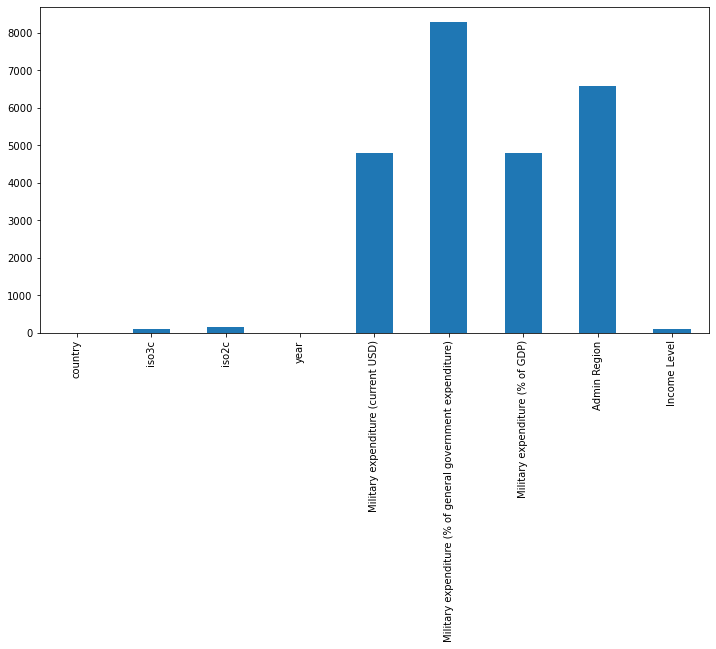

In [231]:
plt.figure(figsize = (12,6))
missing.plot(kind = "bar")

## FILLING IN MISSING DATA TO AVOID FUTURE ISSUES 

In [232]:
millitary.fillna({"iso3c":"none",
                  "iso2c":"none", 
                  "Military expenditure (current USD)": 0, 
                 "Military expenditure (% of general government expenditure)":0,
                 "Military expenditure (% of GDP)": 0,
                 "Admin Region": "none",
                 "Income Level": "none"
                 }, inplace = True)

### SETTING EACH COLUMN TO ITS APPROPRIATE DATA TYPE AND RENAMING SOME COLUMNS


In [233]:
millitary.dtypes

country                                                        object
iso3c                                                          object
iso2c                                                          object
year                                                            int64
Military expenditure (current USD)                            float64
Military expenditure (% of general government expenditure)    float64
Military expenditure (% of GDP)                               float64
Admin Region                                                   object
Income Level                                                   object
dtype: object

In [78]:
millitary["year"] = millitary["year"].astype("int32")

In [234]:
millitary["Military expenditure (% of GDP)"] = millitary["Military expenditure (% of GDP)"].astype("float")

In [235]:
millitary["Military expenditure (current USD)"] = millitary["Military expenditure (current USD)"].astype("int64")

In [236]:
millitary["Military expenditure (% of general government expenditure)"] = millitary["Military expenditure (% of general government expenditure)"].astype("float")

In [237]:
# Creating a Column to represent the Military expenditure in Billions to avoid displaying long numbers
millitary["Millitary Expenditure (in Billion USD)"] = millitary["Military expenditure (current USD)"]/1000000000

In [238]:
millitary

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),Admin Region,Income Level,Millitary Expenditure (in Billion USD)
0,Afghanistan,AFG,AF,1970,2939585,0.000000,1.629606,South Asia,Low income,0.002940
1,Afghanistan,AFG,AF,1971,0,0.000000,0.000000,South Asia,Low income,0.000000
2,Afghanistan,AFG,AF,1972,0,0.000000,0.000000,South Asia,Low income,0.000000
3,Afghanistan,AFG,AF,1973,3341271,0.000000,1.868910,South Asia,Low income,0.003341
4,Afghanistan,AFG,AF,1974,3581366,0.000000,1.610825,South Asia,Low income,0.003581
...,...,...,...,...,...,...,...,...,...,...
13561,Zimbabwe,ZWE,ZW,2016,358065000,7.363048,1.742494,Sub-Saharan Africa (excluding high income),Lower middle income,0.358065
13562,Zimbabwe,ZWE,ZW,2017,340522000,5.519890,1.544948,Sub-Saharan Africa (excluding high income),Lower middle income,0.340522
13563,Zimbabwe,ZWE,ZW,2018,420364000,5.607096,1.222795,Sub-Saharan Africa (excluding high income),Lower middle income,0.420364
13564,Zimbabwe,ZWE,ZW,2019,546939000,2.099816,0.698601,Sub-Saharan Africa (excluding high income),Lower middle income,0.546939


## 1. WHICH COUNTRIES (TOP 10) HAD THE HIGHEST MILLITARY SPENDING IN 2020

In [239]:
hms = millitary[millitary["year"] == 2020].sort_values("Military expenditure (current USD)", ascending = False).loc[[12953
                                            , 2396, 5711, 10352, 12902, 10607, 4538, 6170, 6476, 6068]][["country", "iso3c",
                                                                            "Millitary Expenditure (in Billion USD)"
                                                                                                        ]]

In [240]:
hms

,country,iso3c,Millitary Expenditure (in Billion USD)
12953,United States,USA,778.232200
2396,China,CHN,252.304224
5711,India,IND,72.887447
10352,Russian Federation,RUS,61.712537
12902,United Kingdom,GBR,59.238462
10607,Saudi Arabia,SAU,57.519424
4538,Germany,DEU,52.764761
6170,Japan,JPN,49.148557
6476,"Korea, Rep.",KOR,45.735393
6068,Italy,ITA,28.921343


### VISUALIZING TOP 10 COUNTRIES WITH HIGHEST MILLITARY SPENDING IN 2020

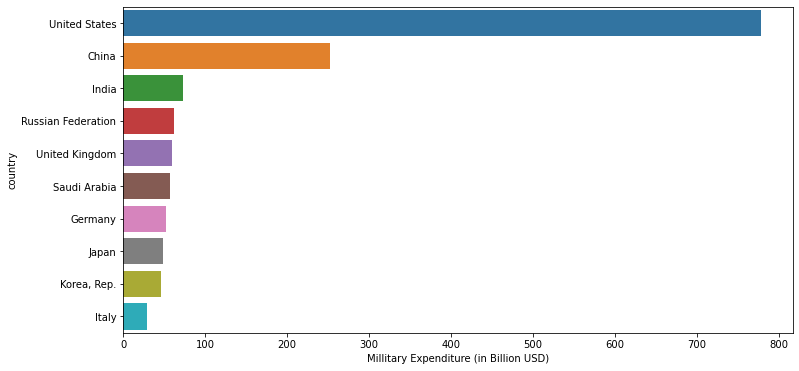

In [308]:
plt.figure(figsize = (12, 6))
sns.barplot(data = hms, y = "country", x = "Millitary Expenditure (in Billion USD)", orient = "h" )

plt.show()

### 2. WHICH SUB-SAHARAN COUNTRIES (TOP 10) HAD THE HIGHEST MILLITARY SPENDING IN 2020

In [265]:
afri = millitary[millitary["Admin Region"] == "Sub-Saharan Africa (excluding high income)"]
afri.reset_index(inplace = True)

In [266]:
del afri["index"]

In [267]:
afri.head()

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),Admin Region,Income Level,Millitary Expenditure (in Billion USD)
0,Angola,AGO,AO,1970,0,0.0,0.0,Sub-Saharan Africa (excluding high income),Lower middle income,0.0
1,Angola,AGO,AO,1971,0,0.0,0.0,Sub-Saharan Africa (excluding high income),Lower middle income,0.0
2,Angola,AGO,AO,1972,0,0.0,0.0,Sub-Saharan Africa (excluding high income),Lower middle income,0.0
3,Angola,AGO,AO,1973,0,0.0,0.0,Sub-Saharan Africa (excluding high income),Lower middle income,0.0
4,Angola,AGO,AO,1974,0,0.0,0.0,Sub-Saharan Africa (excluding high income),Lower middle income,0.0


In [270]:
afri20 = afri[afri["year"] == 2020].sort_values("Military expenditure (current USD)", ascending = False)[["country",
                                                                "iso3c", 
                                                       "Millitary Expenditure (in Billion USD)", 
                                                    "Military expenditure (% of general government expenditure)"
                                                    ]].head(10).reset_index()

In [272]:
del afri20["index"]

In [273]:
afri20

,country,iso3c,Millitary Expenditure (in Billion USD),Military expenditure (% of general government expenditure)
0,South Africa,ZAF,3.150829,2.613176
1,Nigeria,NGA,2.567918,4.961843
2,Kenya,KEN,1.106218,4.404040
3,Angola,AGO,0.993594,7.793800
4,Uganda,UGA,0.984760,13.118894
5,Sudan,SDN,0.934311,8.254452
6,Tanzania,TZA,0.659313,6.052451
7,Cote d'Ivoire,CIV,0.607156,5.010557
8,Mali,MLI,0.593365,12.710286
9,Botswana,BWA,0.545757,9.464421


### VISUALIZING TOP 10 SUB-SAHARAN COUNTRIES WITH HIGHEST MILLITARY SPENDING IN 2020

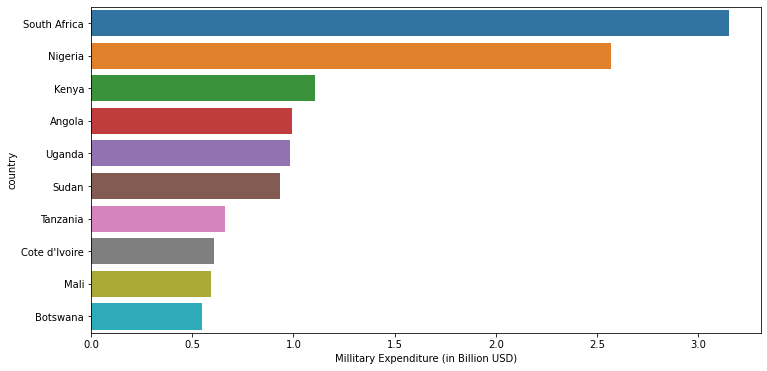

In [314]:
plt.figure(figsize = (12, 6))
sns.barplot(data = afri20, y = "country", x = "Millitary Expenditure (in Billion USD)", orient = "h" )
plt.show()

## 3. WHICH COUNTRIES HAVE SPENT THE MOST PERCENTAGE OF THEIR GENERAL GOVERNMENT EXPENDITURE ON THE MILLITARY AND IN WHICH YEAR

In [193]:
maxGGE = millitary.sort_values(
    "Military expenditure (% of general government expenditure)", ascending = False
).drop_duplicates("country")[["country",  
                              "Military expenditure (% of general government expenditure)","year",
                              "Millitary Expenditure (in Billion USD)"]].reset_index().head(10)

In [194]:
del maxGGE["index"]

In [196]:
maxGGE["Percentage_MilitaryExpenditure"] = maxGGE["Military expenditure (% of general government expenditure)"]

In [199]:
maxGGE

,country,year,Millitary Expenditure (in Billion USD),Percentage_MilitaryExpenditure
0,Kuwait,1991,12.924378,57.478098
1,Sudan,1999,0.429618,47.755282
2,Eritrea,1998,0.263002,47.724920
3,Saudi Arabia,1998,20.861600,41.161212
4,Singapore,2007,6.518529,39.222562
5,Ethiopia,1999,0.703705,36.165394
6,Belarus,2006,0.631831,35.021970
7,Paraguay,1988,0.178436,34.760388
8,"Yemen, Rep.",1994,2.353269,33.352214
9,Chad,2009,0.738904,32.958189


### VISUALIZING THE COUNTRIES HAVE SPENT THE MOST PERCENTAGE OF THEIR GENERAL GOVERNMENT EXPENDITURE ON THE MILLITARY AND IN WHICH YEAR

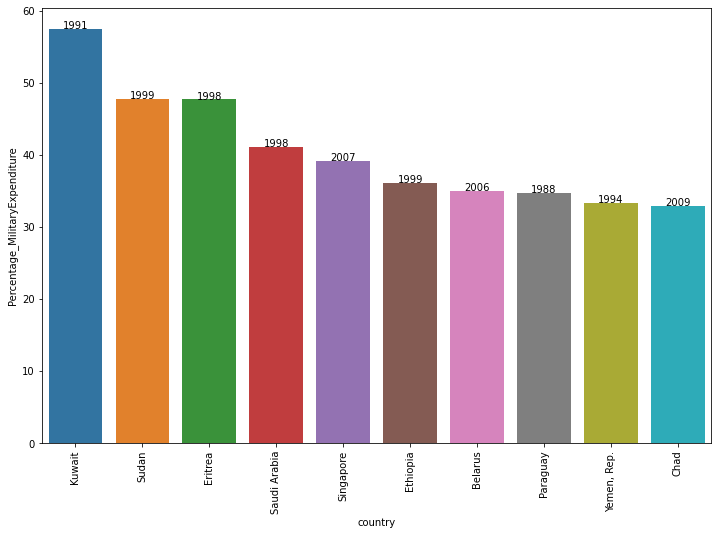

In [303]:
plt.figure(figsize = (12,8))
ax = sns.barplot(data = maxGGE, 
        x = "country", 
        y = "Percentage_MilitaryExpenditure")

for index,row in maxGGE.iterrows():
    ax.text(x = row.name, 
            y = row.Percentage_MilitaryExpenditure,
            s = row.year, color = "black", ha = "center")
plt.xticks(rotation = "vertical")
plt.show()

## 4. COMPARISON BETWEEN RUSSIAN AND UKRAINIAN MILLITARY EXPENDITURES

In [275]:
RusUkr = millitary[(millitary["country"] == "Ukraine") | (millitary["country"] == "Russian Federation")]
RusUkr

,country,iso3c,iso2c,year,Military expenditure (current USD),Military expenditure (% of general government expenditure),Military expenditure (% of GDP),Admin Region,Income Level,Millitary Expenditure (in Billion USD)
10302,Russian Federation,RUS,RU,1970,0,0.000000,0.000000,Europe & Central Asia (excluding high income),Upper middle income,0.000000
10303,Russian Federation,RUS,RU,1971,0,0.000000,0.000000,Europe & Central Asia (excluding high income),Upper middle income,0.000000
10304,Russian Federation,RUS,RU,1972,0,0.000000,0.000000,Europe & Central Asia (excluding high income),Upper middle income,0.000000
10305,Russian Federation,RUS,RU,1973,0,0.000000,0.000000,Europe & Central Asia (excluding high income),Upper middle income,0.000000
10306,Russian Federation,RUS,RU,1974,0,0.000000,0.000000,Europe & Central Asia (excluding high income),Upper middle income,0.000000
...,...,...,...,...,...,...,...,...,...,...
12796,Ukraine,UKR,UA,2016,2943807591,7.779053,3.154777,Europe & Central Asia (excluding high income),Lower middle income,2.943808
12797,Ukraine,UKR,UA,2017,3246786567,6.955612,2.884402,Europe & Central Asia (excluding high income),Lower middle income,3.246787
12798,Ukraine,UKR,UA,2018,4169707536,7.648027,3.192353,Europe & Central Asia (excluding high income),Lower middle income,4.169708
12799,Ukraine,UKR,UA,2019,5419138048,8.498205,3.522485,Europe & Central Asia (excluding high income),Lower middle income,5.419138


## i) TOTAL MILITARY EXPENDITURE OF BOTH COUNTRIES WITHIN 50 YEARS PERIOD (1970-2020)

In [276]:
TME = RusUkr.groupby("country").sum()[["Millitary Expenditure (in Billion USD)"]].reset_index()

In [277]:
TME

,country,Millitary Expenditure (in Billion USD)
0,Russian Federation,1142.354451
1,Ukraine,61.179410


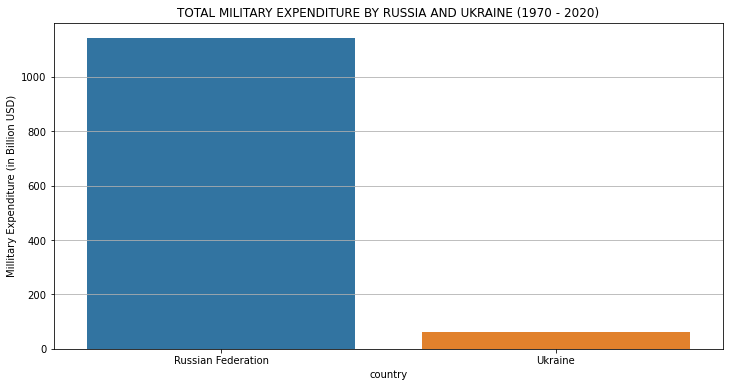

In [278]:
plt.figure(figsize = (12, 6))
plt.grid()
sns.barplot(data = TME, x = "country", y = "Millitary Expenditure (in Billion USD)")
plt.title("TOTAL MILITARY EXPENDITURE BY RUSSIA AND UKRAINE (1970 - 2020)")
plt.ticklabel_format(axis = "y", style = "plain")

### EXPLANATION : 
RUSSIA IN THE LAST 50 YEARS (1970- 2020) HAS SPENT OVER 1.1 TRILLION (DOLLARS) WHILE UKRAINE HAS SPENT ONLY 61.1 BILLION (DOLLARS)

## ii) WHAT IS THE MAXIMUM AMMOUNT SPENT ON THE MILLITARY IN A PARTICULAR YEAR BY RUSSIA AND UKRAINE ?

In [279]:
maxRusUkr = RusUkr.sort_values("Millitary Expenditure (in Billion USD)", ascending = False).drop_duplicates("country")[[
                                            "country",
                                            "Millitary Expenditure (in Billion USD)", 
                                             "Military expenditure (% of general government expenditure)",
                                             "year"]].reset_index()

In [280]:
del maxRusUkr["index"]

In [317]:
maxRusUkr["MillitaryExpenditureInBillions"] = maxRusUkr["Millitary Expenditure (in Billion USD)"] 

In [319]:
maxRusUkr

,country,Military expenditure (% of general government expenditure),year,MillitaryExpenditureInBillions
0,Russian Federation,11.122178,2013,88.352896
1,Ukraine,8.803387,2020,5.924201


### VISUALIZING THE MAXIMUM AMMOUNT SPENT ON THE MILLITARY IN A PARTICULAR YEAR BY RUSSIA AND UKRAINE

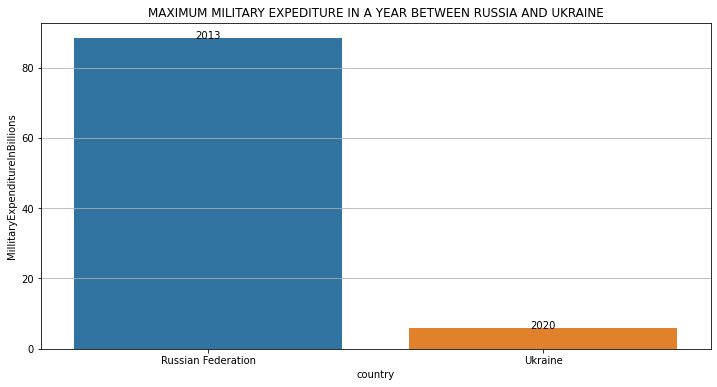

In [321]:
plt.figure(figsize = (12, 6))
plt.grid()
ax = sns.barplot(data = maxRusUkr, x = "country", y = "MillitaryExpenditureInBillions")

for index,row in maxRusUkr.iterrows():
    ax.text(x = row.name, 
            y = row.MillitaryExpenditureInBillions,
            s = row.year, color = "black", ha = "center")

plt.title("MAXIMUM MILITARY EXPEDITURE IN A YEAR BETWEEN RUSSIA AND UKRAINE")
plt.ticklabel_format(axis = "y", style = "plain")

### EXPLANATION : 
THE MAXIMUM MILITARY EXPENDITURE BY RUSSIA IN A YEAR WAS 88.3 BILLION DOLLARS IN 2013 WHICH AMMOUNTED TO %14.1 OF THE GENERAL GOVERNMENT EXPENDITURE IN THAT YEAR. This is not suprising because in the FEBRUARY AND MARCH of 2014, Russian invaded and subsequently took over the CRIMEAN PENINSULA FROM UKRAINE.
WHILE FOR UKRAINE, THE MAXIMUM MILITARY EXPENDITURE IN A YEAR WAS 5.9 BILLION DOLLARS  IN 2020. THIS AMMOUNTED TO %8.8 OF THE GENERAL UKRAINIAN GOVERNMENT EXPENDITURE IN THAT YEAR.

## iii) YEARLY TOTAL MILITARY EXPENDITURE OF BOTH COUNTRIES WITHIN THE LAST 10 YEARS PERIOD (2010-2020)

In [298]:
rusukr10 = RusUkr[RusUkr["year"] >= 2010][["country","year", 
                              "Millitary Expenditure (in Billion USD)",
                              "Military expenditure (% of general government expenditure)"]]

In [301]:
rusukr10

,country,year,Millitary Expenditure (in Billion USD),Military expenditure (% of general government expenditure)
10342,Russian Federation,2010,58.720228,10.122296
10343,Russian Federation,2011,70.237524,10.321464
10344,Russian Federation,2012,81.469400,10.841556
10345,Russian Federation,2013,88.352896,11.122178
10346,Russian Federation,2014,84.696505,11.772198
10347,Russian Federation,2015,66.421822,13.810711
10348,Russian Federation,2016,69.245295,14.828395
10349,Russian Federation,2017,66.913034,12.199182
10350,Russian Federation,2018,61.609205,11.403160
10351,Russian Federation,2019,65.201336,11.398999


### VISUALIZING THE YEARLY TOTAL MILITARY EXPENDITURE OF BOTH COUNTRIES WITHIN THE LAST 10 YEARS PERIOD (2010-2020)

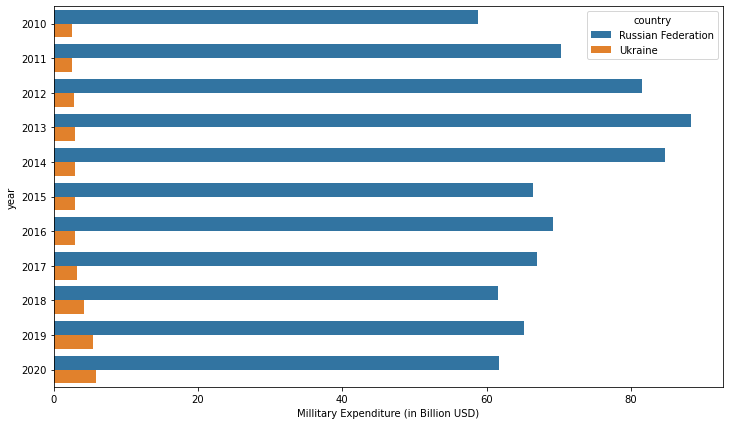

In [331]:
plt.figure(figsize = (12,7))
sns.barplot(data = rusukr10, y = "year", x = "Millitary Expenditure (in Billion USD)", hue = "country", orient = "h")
plt.show()